# Hierachical Clustering

### Importamos las librerias necesarias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs #Para generar nuestro DataSets
from sklearn.cluster import AgglomerativeClustering #Clustering herarquico de tipo aglomerativo
from sklearn.metrics import silhouette_score #Para medir el performance de nuestro cluster
from scipy.cluster.hierarchy import dendrogram, linkage #Vizualizaciones de dendograma

### Preparando los datos de prueba

In [7]:
X, y, c = make_blobs(n_samples = 500, cluster_std = 0.8, centers = 4, n_features = 2, return_centers = True, random_state = 7)

df_blobs = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y' : y
})

df_center = pd.DataFrame({
    'x1' : c[:, 0],
    'x2' : c[:, 1]
})

### Vizaualización de datos

<Axes: xlabel='x1', ylabel='x2'>

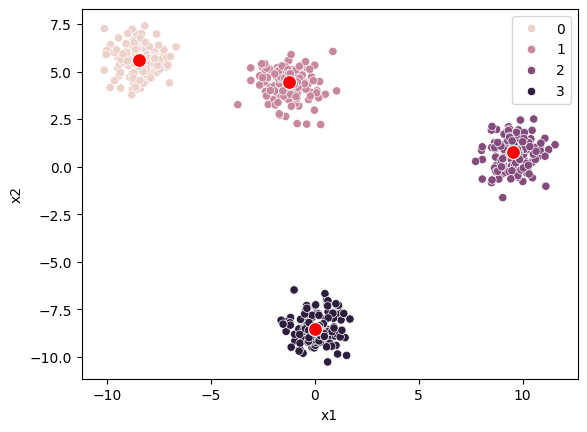

In [15]:
sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2', hue = y) # Graficamos los datos
sns.scatterplot(data = df_center, x = 'x1', y = 'x2', markers = 'o', color = 'red', s = 100)#Graficamos los centroides

### Dendograma y Hierarchical clustering

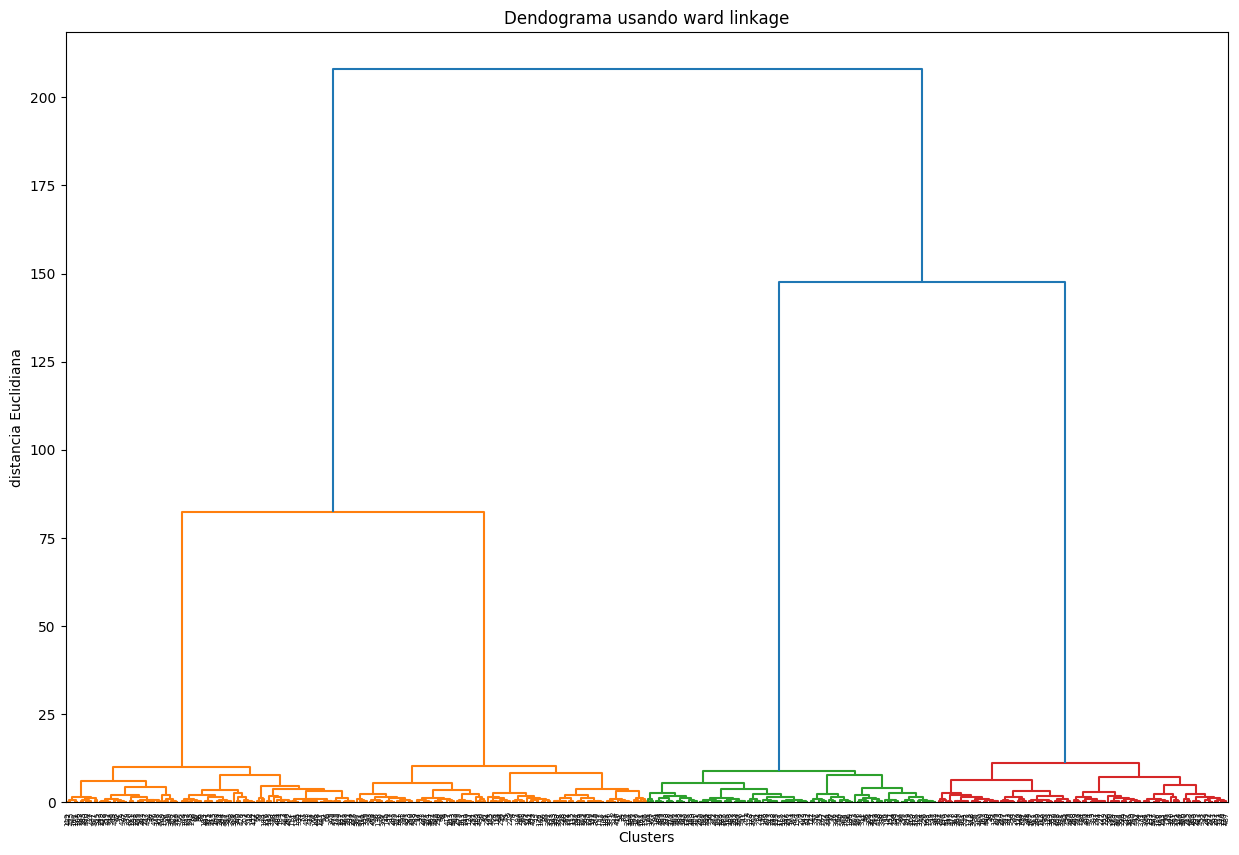

In [21]:
plt.figure(figsize = (15,10))
dendogram_plot = dendrogram(linkage(X, method = 'ward'))
plt.title('Dendograma usando ward linkage')
plt.xlabel('Clusters')
plt.ylabel('distancia Euclidiana')
plt.show()

Visualmente se puede llegar a la conslusión que 4 cluistering son buena opción, por lo que en nuestro clustering Aglomerativo tendrá 4  clusters

In [34]:
hc = AgglomerativeClustering( n_clusters = 4, affinity = 'euclidean', linkage = 'ward') # Affinity es la distancia a utilizar
y_hc = hc.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
df_blobs['cluster'] = y_hc

<Axes: xlabel='x1', ylabel='x2'>

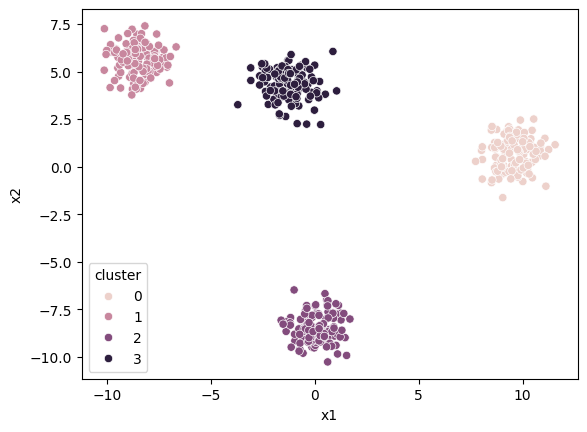

In [36]:
sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2', hue = 'cluster')

In [37]:
df_blobs

,x1,x2,y,cluster
0,-0.320970,4.338705,1,3
1,-2.231586,3.271233,1,3
2,-8.559968,4.477236,0,1
3,0.111800,3.987295,1,3
4,-0.557967,-9.808574,3,2
...,...,...,...,...
495,9.500290,1.352141,2,0
496,-8.628119,4.175966,0,1
497,-8.628919,6.156211,0,1
498,-1.916354,4.867863,1,3


### Evaluación de Hierarchical Clustering

In [40]:
silhouette_score(X, y_hc)

0.8492094499598514

***Punto importante:***

* Para graficar el coeficiente de cilueta se necesitan los centroides.
* El metodo de hierarchical clustering no utiliza centroides debido a que mide distancias entre todos los puntos.
* skelearn ha publicado el codigo para poder generar el grafico de siluetas debido a que no existe una libreria.
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Copiamos el codigo directamente de la pagina(Cambiando el modelo y lops datos a utilizar) y lo ejecutamos:

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7843218500807961
For n_clusters = 4 The average silhouette_score is : 0.8492094499598514
For n_clusters = 5 The average silhouette_score is : 0.7198575242454048


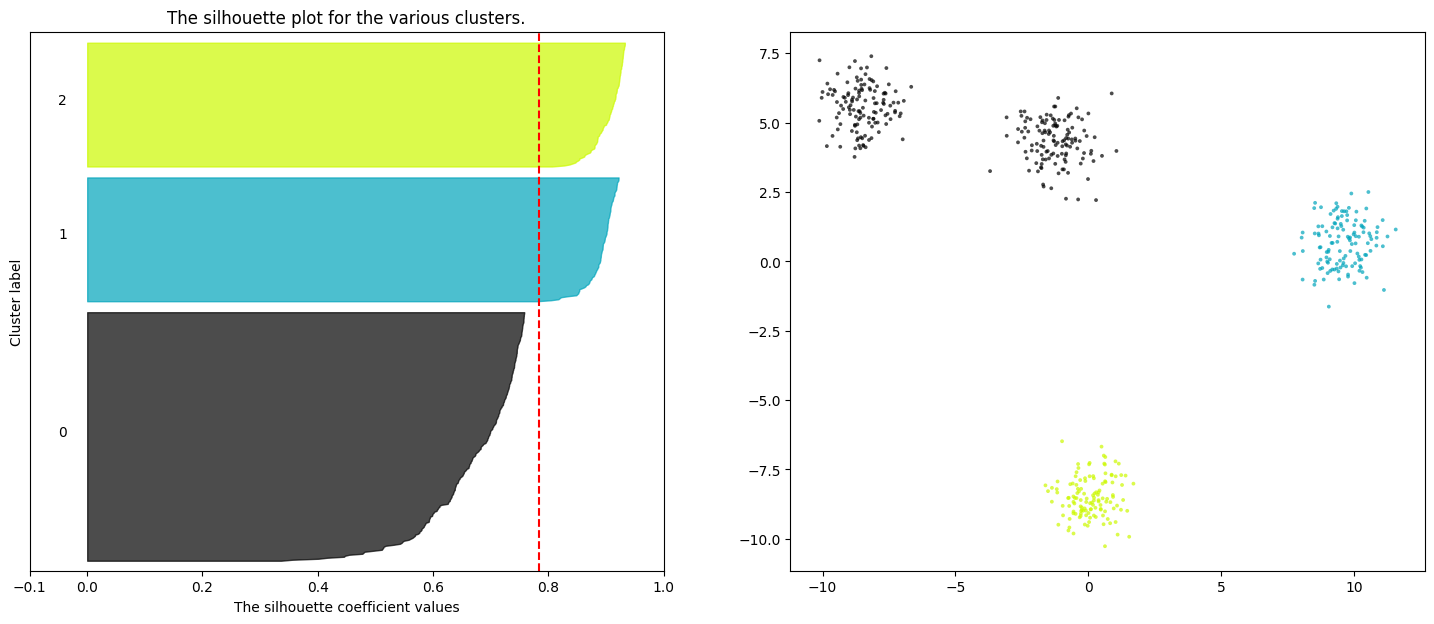

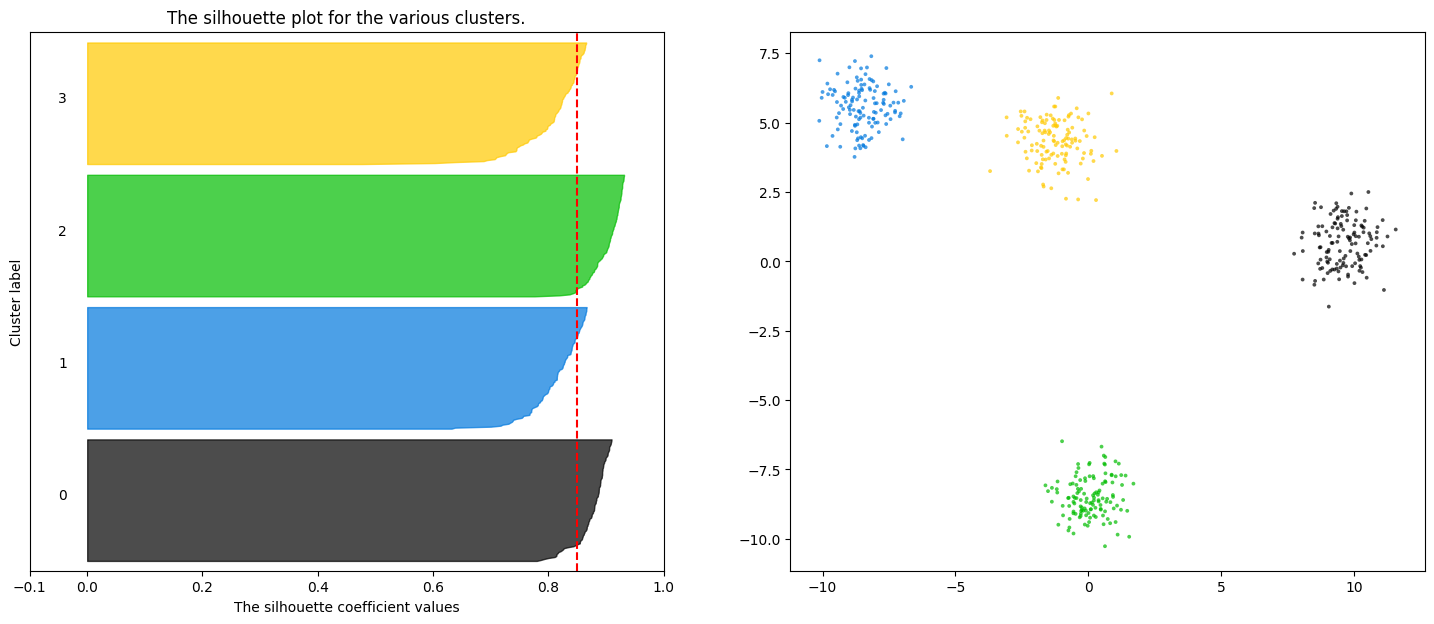

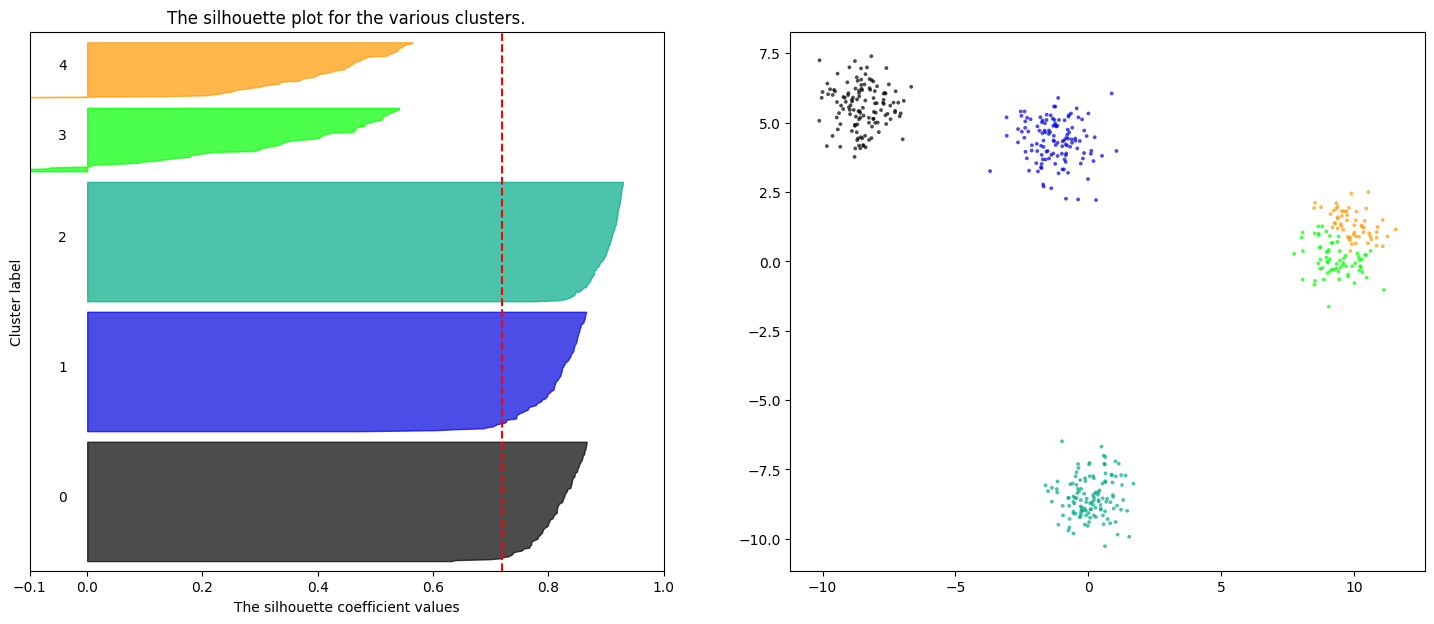

In [44]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    
    clusterer = AgglomerativeClustering( n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
plt.show()

Con el grafico anterior se pudo observar que 4 clusters era la mejor alternativa.